<img src = "DAGMap_header.png" width = 1000>

# Visualizing Phylogenetic Networks
An implementation of algorithm described in in _Tollis, I. G., & Kakoulis, K. G. (2016)_

Authors: *Syed Haque, Brennan Klein & Leonardo Torres*

## Background: Trees
Tree metaphors have been prevalent throughout human history. Visually, they offer an intuitive means of presenting hierarchical structures in networks of information, relationships, or histories. Under this metaphor, each _leaf_ of a tree can represent people, ideas, concepts, entities, all connected by a _branch_ to another leaf.

It was Charles Darwin who began to push us past the tree *metaphor* of life and into an actual, theoretical realization of a tree-like structure as a fundamental property of organic matter. In Darwin's conception of the "Tree of Life", each leaf is a species, and there is a branch between two leaves if one of the leaves is an immediate genetic predecesor of the other. A this point, this Tree of Life metaphor was not only a vital construct for communicating his ideas about the evolution of species via natural selection, but it eventually served as a way to *generate insights* about the evolutionary process. This was useful for decades, but again, we found ourselves falling short of explanations using our current tools to visualize these networks of speciaiton. 
<img src="https://s-media-cache-ak0.pinimg.com/736x/f0/75/80/f07580944b8d04995662d301c4455837.jpg" width=350>
<center>Figure 1: Illustration from the 16th century [*anonymous*].</center> 
<center>The fall of man represented using branches of a tree.</center>

For example, Doolittle (1999) describes the struggle that evolutionary biologists faced due to an *overreliance* on the tree metaphors listed above. 

Tree diagrams traditionally have "parent" leafs, which separate into "children" leafs, which then become the parents of the next generation, and so on. In evolutionary theory, this had traditionally made sense with a strictly Darwinian understanding of evolution, but with more knowledge of horizontal transfer of genes across kingdoms and phylums, the traditional visual metaphor was not only insufficient, it was hindering progress for pushing evolutionary theory further.

<img src="Tree-of-life-Origin_of_Species-1859.png" width=400>
<center>Figure 2: Recreation of Darwin's Tree of Life [*Hattom Garden*].</center> 
<center>The image above depicts the problem that biologists faced. Evolutionary phylogentic</center>
<center> trees sometimes have interacting branches, whereas the above network lacks them.</center>


Phylogeneticists, Doolittle claims, could not find the Tree of Life as they had imagined it because they lacked an updated, compelling visual metaphor with which to describe the evolutionary processes we now know exist. Horizontal gene transfer, hybridization, and genetic recombination are all processes on networks, so the field needed a better *network* visualization in order to communicate their insight

## Background: Phylogenetic Networks
<img src = "https://pbs.twimg.com/profile_images/425414883258023936/lHCSqrAp.jpeg" width = 500>
<center>Figure 3: Sensationalist Headlinism [*New Scientist, 2009*].</center> 


Phylogenetic Networks are usually determined by inferring a network structure from co-occurences of genes in a given species or by simulations of evolutionary scenarios using computer models of speciation. The latter is quite useful for testing hypotheses about the presence or absence of horizontal gene transfer, recombination and mixability of genes, as well as the effect of varying fitnesses of different alleles in a population leading to a new species.



<img src="Reticulation Network.png" width = 500>
<center>Figure 4: A reticulated tree diagram [*Doolittle, 2009*]</center> 
<center>Reticulated Trees are now thought to have more explanatory power for describing</center> 
<center>nature's actual mechanisms for speciation.</center>


EDITTHIS
The main question about phylogenetic networks is how to reconstruct them from available data. This data can be of different kinds: sequences (sometimes binary sequences), distances between those sequences, rooted or unrooted trees, triplets (rooted trees on three leaves), quartets (unrooted trees on four leaves), splits (bipartitions of the set of leaves), clusters (subset of leaves which should appear together in the network), multilabeled trees (in the context of duplications), or even networks (to get a consensus network from the input).

This question gave rise to some other ones: how to visualize phylogenetic networks (which is linked with graph drawing, except in phylogeny the lengths of the branches may be constrained), or how to compare them in the context of evaluation of the reconstruction methods. These problematics give rise to many theoretical problems, some of which are polynomial, but many of which are NP-complete. Fixed-parameter tractable, approximation algorithms, or heuristics have thus been developed to solve them.

Depending on the problem adressed, and its complexity, the network used in the analysis may be an explicit phylogenetic network if it describes biological events, or an abstract phylogenetic network if its edges may not be interpreted biologically. A popular example of abstract network in the literature is the split network which can be used as a visualization of a set of incompatible phylogenetic trees, therefore giving some understanding on the conflicts present in the data.

#### Problem: 
The above example clearly shows how quickly tree networks can devolve into visualizations that convey little useful information due to the high branch-overlap between the leafs of the tree. Visually, there must be a better way to approach these objects.

## Background: Directed Acyclic Graphs (DAGs)

## Background: Galled Networks

<img src = "fig1_gallstructure.png" width = 300>

## Example: Squarified TreeMaps

In [49]:
class Rect:
    def __init__(self, x, y, w, h):
        self.x = x
        self.y = y
        self.w = w
        self.h = h

    def shortestEdge(self):
        return min(self.w, self.h)

    def placeRow(self, row):
        """Input is a list of areas"""

        A = sum(row)
        aw = A / self.h
        ah = A / self.w

        cx = self.x
        cy = self.y

        coordinates = []
        if (self.w >= self.h):
            for r in row:
                dy = r / aw
                coordinates.append((cx, cy, cx + aw, cy + dy))
                cy += dy
        else:
            for r in row:
                dx = r / ah
                coordinates.append((cx, cy, cx + dx, cy + ah))
                cx += dx
        
        return coordinates

    def cutArea(self, area):
        """Remove the area from this rectangle, return new rectangle"""
        if self.w >= self.h:
            aw = area / self.h
            nw = self.w - aw
            return Rect(self.x + aw, self.y, nw, self.h)
        else:
            ah = area / self.w
            nh = self.h - ah
            return Rect(self.x, self.y + ah, self.w, nh)

        
def computeSTM((w, h), areas):
    """ Compute a squarified tree map.
    The algorithm comes from "Squarified Treemaps", Mark Bruls, Kees Huizing, and Jarke J. van Wijk.
    https://github.com/imranghory/treemap-squared/blob/master/treemap-squarify.js
    """
    return squarify(areas, [], Rect(0,0,w,h), [])

def squarify(children, row, rect, results):
    if not children:
        results += rect.placeRow(row)
        return results

    w = rect.shortestEdge()

    c = children[0]
    if improvesRatio(row, c, w):
        squarify(children[1:], row + [c], rect, results)
    else:
        results += rect.placeRow(row)
        r2 = rect.cutArea(sum(row))
        squarify(children, [], r2, results)

    return results

def improvesRatio(row, nextnode, w):
    # always improves for empty row
    if not row:
        return True

    return worst(row, w) >= worst(row + [nextnode], w)
    

def worst(row, w):
    """Row is list of areas for each element in the row,
    w is the size of the side of the row """
    square = lambda n: n*n
    ss = square(sum(row))
    ww = square(w)
    ma = (ww * max(row)) / ss
    mi = ss / (ww * min(row))

    return max(ma, mi)

In [50]:
from random import randint
from math import ceil
import matplotlib
matplotlib.use("Agg")
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

# initial rectangle dimensions
r = (16,9)

# list of areas to place on the rectangle
areas = map(lambda x: (1/(float(pow(x,1.6))+1))*40, range(1,24))

# scale
s = 100

def scale(lst):
    return map(lambda x: int(ceil(x*s/3)), lst)

def rndcolour():
    return (randint(0,255), randint(0,255), randint(0,255))

im = Image.new("RGBA", scale(r))

draw = ImageDraw.Draw(im)

for box in computeSTM(r, areas):
    print "drawing ", scale(box)
    draw.rectangle(scale(box), fill=rndcolour())

drawing  [0, 0, 111, 201]
drawing  [0, 201, 111, 300]
drawing  [111, 0, 172, 108]
drawing  [111, 108, 172, 179]
drawing  [111, 179, 172, 230]
drawing  [111, 230, 172, 270]
drawing  [111, 270, 172, 300]
drawing  [172, 0, 201, 54]
drawing  [172, 54, 201, 99]
drawing  [172, 99, 201, 137]
drawing  [172, 137, 201, 170]
drawing  [172, 170, 201, 198]
drawing  [172, 198, 201, 223]
drawing  [172, 223, 201, 246]
drawing  [172, 246, 201, 266]
drawing  [172, 266, 201, 284]
drawing  [172, 284, 201, 300]
drawing  [201, 0, 208, 61]
drawing  [201, 61, 208, 117]
drawing  [201, 117, 208, 168]
drawing  [201, 168, 208, 215]
drawing  [201, 215, 208, 259]
drawing  [201, 259, 208, 300]


In [51]:
del draw

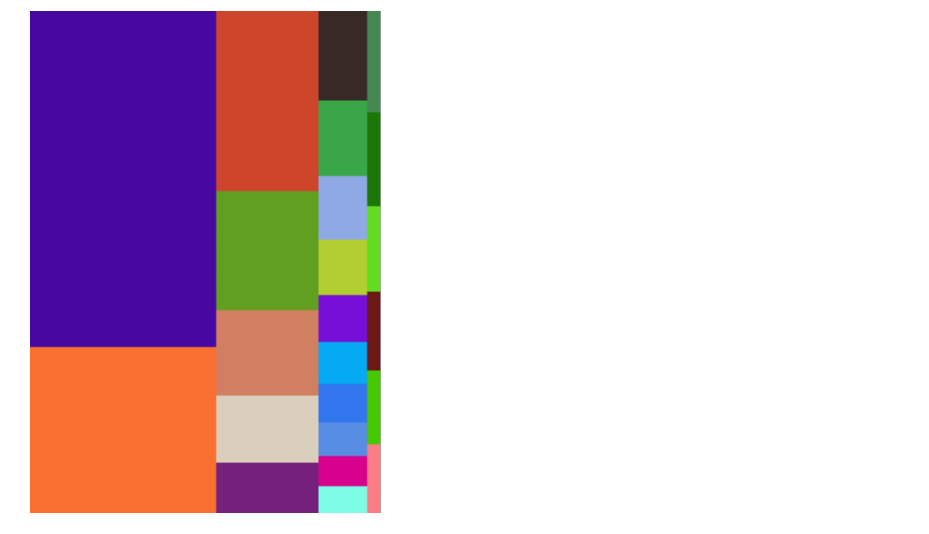

In [52]:
im.save("test.png", "PNG")
pil_im = Image.open('test.png', 'r')
plt.figure(figsize = (16,9))
plt.imshow(np.asarray(pil_im))
plt.axis('off')
plt.show()

### References:
* Balzer, M., and O. Deussen. "Voronoi Treemaps." *IEEE Symposium on Information Visualization*, 2005. INFOVIS 2005.

* Bruls, Mark, Kees Huizing, and Jarke J. Van Wijk. "Squarified Treemaps." *Eurographics Data Visualization* 2000 (2000): 33-42.

* Doolittle W. F.. Phylogenetic classification and the universal tree. *Science*, 284 (5423): 2124–2129, 1999.

* Gusfield, D., Eddhu, S., and Langley, C. H.. Efficient reconstruction of phylogenetic networks with constrained recombination. *Computational Systems Bioinformatics Conference* (Proc. CSB 2003), pages 363–374, 2003.

* Huson, Daniel H., and David Bryant. "Application of phylogenetic networks in evolutionary studies." Molecular biology and evolution 23.2 (2006): 254-267.

* Huson, Daniel H., and Celine Scornavacca. "A survey of combinatorial methods for phylogenetic networks." *Genome biology and evolution* 3 (2011): 23-35.

* Huson, D. H., and Klöpper T. H.. Beyond galled trees - decomposition and computation of galled networks. In T. Speed and H. Huang, editors, *11th Annual International Conference on Research in Computational Molecular Biology* (Proc.  RECOMB 2007), pages 211–225, Springer-Verlag, 2007.

* Huson, D. H., Rupp, R., Berry, V., Gambette, P., and Paul, C.. Computing galled networks from real data. *Bioinformatics*, 25(12):i85–i93, 2009.

* Johnson B., and Shneiderman, B.. Tree-Maps: A Space-filling Approach to the Visualization of Hierarchical Information Structures. *2nd Conference on Visualization* (Proc. VIS 1991), pages 284–291, IEEE Computer Society Press, 1991.

* Lima, M. (2014). The book of trees: visualizing branches of knowledge. S. E. Stemen (Ed.). *Princeton Architectural Press*.

* Maddison, Wayne P. "Gene trees in species trees." *Systematic biology* 46.3 (1997): 523-536.

* Makarenkov, Vladimir. "T-REX: reconstructing and visualizing phylogenetic trees and reticulation networks." *Bioinformatics* 17.7 (2001): 664-668.

* Tsiaras, V., Triantafilou, S., and Tollis, I. G.. Dagmaps: Space filling visualization of directed acyclic graphs. *Graph Algorithms and Applications*, 13(3):319–347, 2009.

* Wang, L., Zhang K., and Zhang, L.. Perfect phylogenetic networks with recombination.  *Journal of Computational Biology*, 8(1):69–78, 2001.

* Wickett, Norman J., et al. "Phylotranscriptomic analysis of the origin and early diversification of land plants." *Proceedings of the National Academy of Sciences* 111.45 (2014): E4859-E4868.